# Análise das Características do Solo ideiais para cada Cultura

## Projeto da disciplina SME0860 - Aprendizado de Máquina Aplicado a Problemas

### Membros

* Alexandre E. de Souza Jesus - alexandre_souza@usp.br - **12559506**

* Eduardo Zaffari Monteiro - eduardozaffarimonteiro@usp.br - **12559490**

* Lucas Ivars Cadima Ciziks - luciziks@usp.br - **12559472**

# 1. Introdução

O uso do solo de maneira adequada é de fundamental importância para maximizar o retorno do plantio e mantê-lo em boas condições para que possa ser utilizado por vários anos sem degradação. Caso o solo seja mal manejado, pode-se acabar com um terreno infértil, o que aumenta a demanda de recursos para o cultivo e recuperação da área de plantio.

Conforme o solo é utilizado para o plantio de um tipo de alimento, ocorre a diminuição dos tipos de nutrientes consumidos por essa planta, e em contrapartida os outros se tornam abundantes pelo acúmulo durante o tempo em que não foi consumido. Dessa forma, pode-se realizar a rotação de culturas, que consiste em plantar alimentos que consomem nutrientes diferentes de maneira cíclica, fazendo com que o solo se mantenha mais bem preservado.

Com objetivo de facilitar a escolha da cultura a ser semeada em um terreno específico será feito o treinamento de um modelo de aprendizado supervisionado. Para isso, serão utilizados dados que consistem em características do terreno, principalmente relacionadas à quantidade de nutrientes e substâncias nele presentes. A classificação dar-se-á de acordo com um tipo de cultura que é considerado ideal para o solo observado.

A tabela de dados apresenta 2200 diferentes condições de solo e suas respectivas culturas ideais, as quais são divididas em 22 classes que indicam diferentes sementes e frutas. Para cada um desses terrenos existem valores de quantidade de nitrogênio, fósforo, potássio, além de temperatura, umidade e pH, além da precipitação plantação recebe durante o crescimento.

# 2. Metodologia

O projeto está sendo realizado e versionado remotamente através da plataforma Github. Seu acesso é possível por meio do link https://github.com/ale-souza/crop-recommendation

## 2.1. Origem dos Dados
Os dados foram obtidos diretamente da plataforma kaggle, um site para estudo de ciência de dados e machine learning, e podem ser obtidos através do link https://www.kaggle.com/datasets/aksahaha/crop-recommendation. Segundo o usuário Abhishek Kumar, que disponibilizou os dados, eles são provenientes do ICAR (Indian Council of Agriculture Research), e complementados por pesquisas na internet feitas por ele.

## 2.2 Dicionário de Dados
* **Nitrogênio (nitrogen)**: Representa a quantidade de nitrogênio (em kg/ha) presente no solo para a cultura. O nitrogênio é um nutriente essencial para o crescimento de plantas, e sua deficiência ou excesso pode afetar o crescimento e a produção da cultura;

* **Fósforo (phosphorus)**: Representa a quantidade de fósforo (em kg/ha) presente no solo para a cultura. Também é um elemento essencial no plantio, sendo importante para processos como transferência de energia e fotossíntese;

* **Potássio (potassium)**: Representa a quantidade de potássio (em kg/ha) presente no solo para a cultura. Também é um elemento essencial, e é importante para processos fisiológicos como regulação de água e transporte de nutrientes;

* **Temperatura (temperature)**: Representa a temperatura média (em Celsius) durante o período de crescimento da cultura. A temperatura é um fator ambiental importante que pode afetar o crescimento e o desenvolvimento das plantas, e cada cultura possui uma temperatura ideal;

* **Umidade (humidity)**: Representa a humidade relativa (em porcentagem) durante o período de crescimento da cultura. A humidade é outro fator ambiental importante, tendo em vista que uma alta humidade pode promover a proliferação de fungos e desenvolvimento de doenças;

* **pH**: Representa o pH da cultura durante seu período de crescimento. O pH é uma medida de acidez ou alcalinidade do solo e pode afetar a disponibilidade de nutrientes para a cultura;

* **Precipitação (rainfall)**: Representa a precipitação (em mm) durante o período de crescimento da cultura. Cada cultura necessita de uma quantidade diferente de água, o que torna a precipitação outro fator ambiental importante;

* **Crop (label)**: Representa o tipo da cultura.

# 3. Coleta dos Dados

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [9]:
# Leitura dos dados do problema
df = pd.read_csv('Crop_recommendation.csv')

In [10]:
# Limpando dataset
df = df.drop(['Unnamed: 8', 'Unnamed: 9'], axis=1)
df = df.rename(columns={"label": "crop"})
df.head()

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall,crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [11]:
# Verificando as categorias de plantação
labels = df['crop'].astype('category').values
labels = list(labels.categories)
labels

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

# 4. Análise Exploratória dos Dados

## 4.1. Medidas Descritivas

In [12]:
# Função para calcular o coeficiente de variância (CV)
def coeficiente_variancia(table):
    return 100 * table.std() / table.mean()

# Função para calcular a amplitude
def amplitude(table):
    return table.max() - table.min()

# Aplicando medidas de posição e dispersão aos atributos preditivos
medidas_descritivas = df.drop(["crop"], axis=1).agg(["min", "max", "mean", "median", "var", "std", coeficiente_variancia, amplitude])

In [13]:
# Renomeando das medidas descritivas
novos_nomes = {
    "min":"Minimo",
    "max": "Maximo",
    "mean":"Media",
    "median": "Mediana",
    "var": "Variancia",
    "std": "Desvio-padrao",
    "coeficiente_variancia":"Coeficiente de Variancia",
    "amplitude": "Amplitude"
}

medidas_descritivas = medidas_descritivas.rename(novos_nomes)

# Arredondando casas decimais das medidas descritivas e de dispersão
medidas_descritivas = medidas_descritivas.round(3)

In [14]:
medidas_descritivas

,Nitrogen,phosphorus,potassium,temperature,humidity,ph,rainfall
Minimo,0.000,5.000,5.000,8.826,14.258,3.505,20.211
Maximo,140.000,145.000,205.000,43.675,99.982,9.935,298.560
Media,50.552,53.363,48.149,25.616,71.482,6.469,103.464
Mediana,37.000,51.000,32.000,25.599,80.473,6.425,94.868
Variancia,1362.890,1088.068,2565.213,25.642,495.677,0.599,3020.424
Desvio-padrao,36.917,32.986,50.648,5.064,22.264,0.774,54.958
Coeficiente de Variancia,73.029,61.814,105.190,19.768,31.146,11.963,53.119
Amplitude,140.000,140.000,200.000,34.850,85.724,6.430,278.349


A partir das medidas descritivas, pode-se ter uma ideia inicial das distribuições das características. É possível inferir que as variáveis *temperature* e *pH* possuem uma curva simétrica, já que suas médias e medianas são bem próximas, enquanto *humidity* provavelmente possui uma curva assimétrica à esquerda. Para todos os outros atributos as curvas são possivelmente assimétricas à direita.

No que tange as medidas de dispersão, a análise anterior é reforçada. As medidas de variância e desvio-padrão apresentam valores altos para as variáveis que não são simétricas, o que indica que há uma alta variabilidade nos dados. Ou seja, há valores que possuem uma grande distância da média.


## 4.2. Visualização dos Dados

### 4.2.1. Histogramas

Abaixo, é possível observar o formato da curva dos atributos. Assim, há ainda mais evidências de que a análise anteriormente feita está, provavelmente, correta. Fazem-se necessários, então, testes de hipóteses.

<Axes: xlabel='Nitrogen', ylabel='Count'>

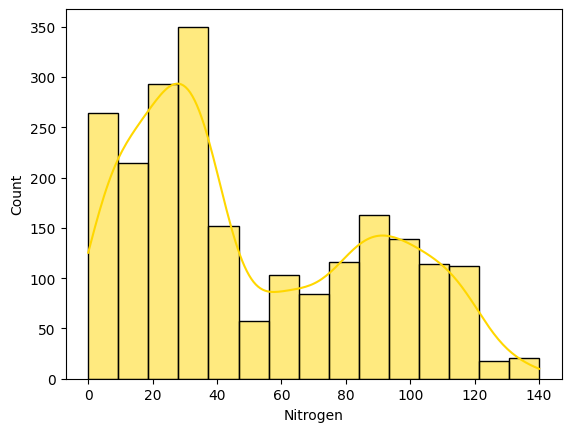

In [15]:
# Nitrogen
sns.histplot(data=df, x="Nitrogen", kde=True, color="gold")

<Axes: xlabel='phosphorus', ylabel='Count'>

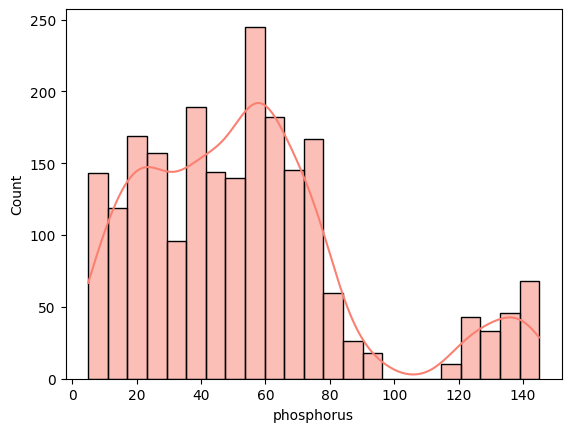

In [16]:
# Phosphorus
sns.histplot(data=df, x="phosphorus", kde=True, color="salmon")

<Axes: xlabel='potassium', ylabel='Count'>

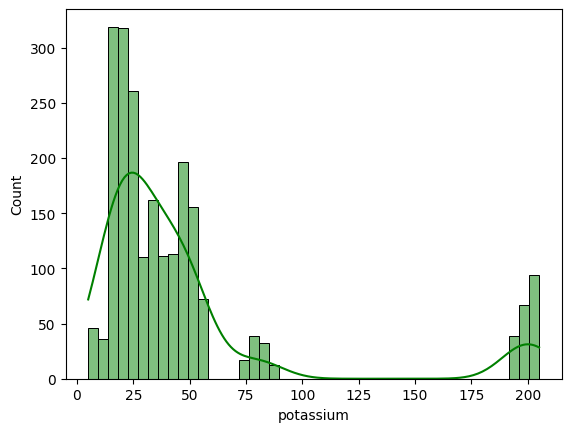

In [17]:
# Potassium
sns.histplot(data=df, x="potassium", kde=True, color="green")

<Axes: xlabel='temperature', ylabel='Count'>

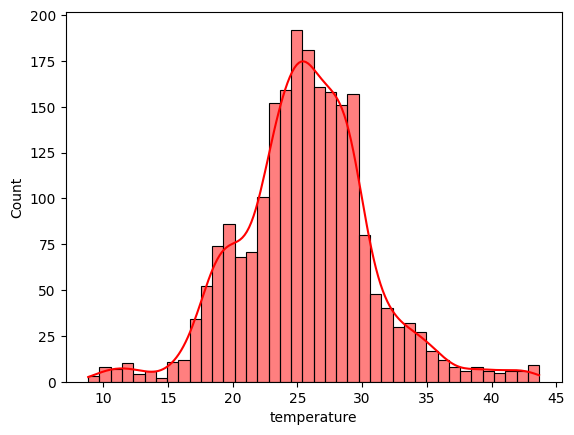

In [18]:
# temperature
sns.histplot(data=df, x="temperature", kde=True, color="red")

Percebe-se, como anteriormente dito, que a distribuição dos dados referentes à variável temperatura provavelmente segue uma distribuição.

<Axes: xlabel='humidity', ylabel='Count'>

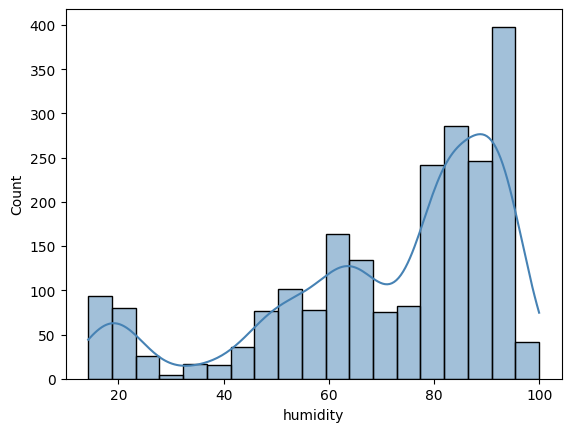

In [19]:
# Humidity
sns.histplot(data=df, x="humidity", kde=True, color="steelblue")

<Axes: xlabel='ph', ylabel='Count'>

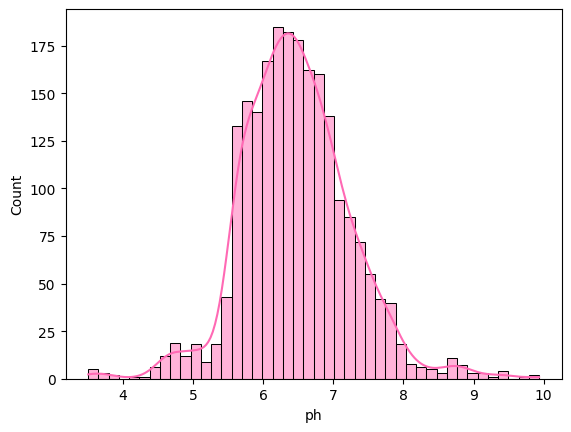

In [20]:
# ph
sns.histplot(data=df, x="ph", kde=True, color="hotpink")

Percebe-se, como anteriormente dito, que a distribuição dos dados referentes à variável pH provavelmente segue uma distribuição.

<Axes: xlabel='rainfall', ylabel='Count'>

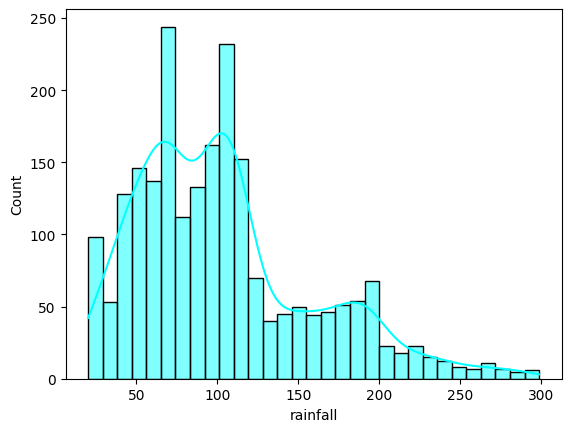

In [21]:
## Rainfall
sns.histplot(data=df, x="rainfall", kde=True, color="aqua")

### 4.2.2. Boxplots

Com os *boxplots*, é possível comparar a distribuição dos dados em relação ao atributo-alvo. Mais uma vez, a teoria de que as variáveis *pH* e *temperature* são mais balanceadas é corroborada.

<Axes: xlabel='Nitrogen', ylabel='crop'>

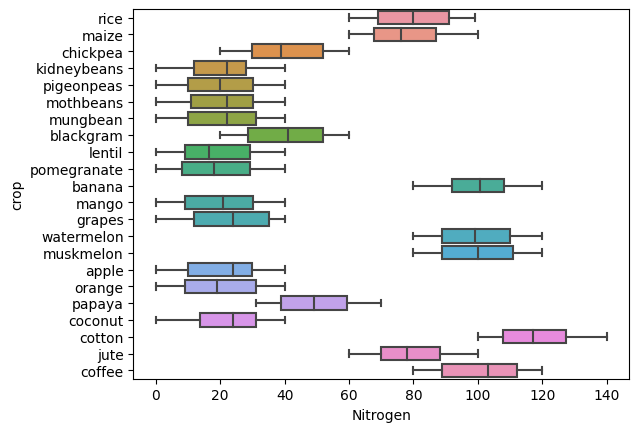

In [22]:
# --------------------
#   Nitrogen x Crop
# --------------------

sns.boxplot(x=df["Nitrogen"], y=df["crop"])

<Axes: xlabel='phosphorus', ylabel='crop'>

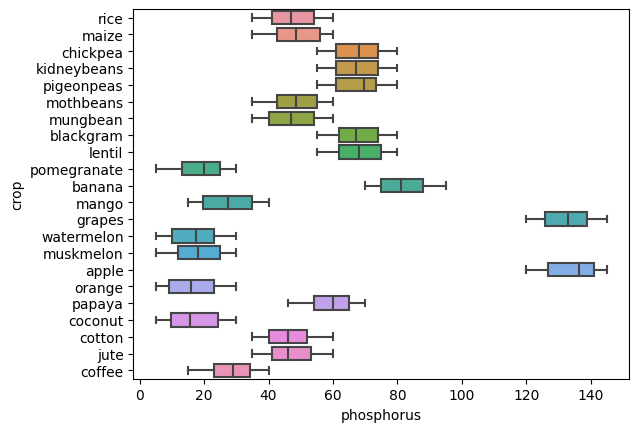

In [23]:
# ----------------------
#   Phosphorus x Crop
# ----------------------

sns.boxplot(x=df["phosphorus"], y=df["crop"])

<Axes: xlabel='potassium', ylabel='crop'>

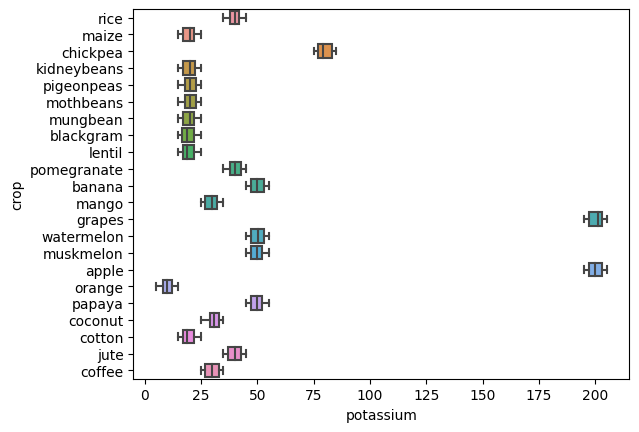

In [24]:
# ---------------------
#   Potassium x Crop
# ---------------------

sns.boxplot(x=df["potassium"], y=df["crop"])

<Axes: xlabel='temperature', ylabel='crop'>

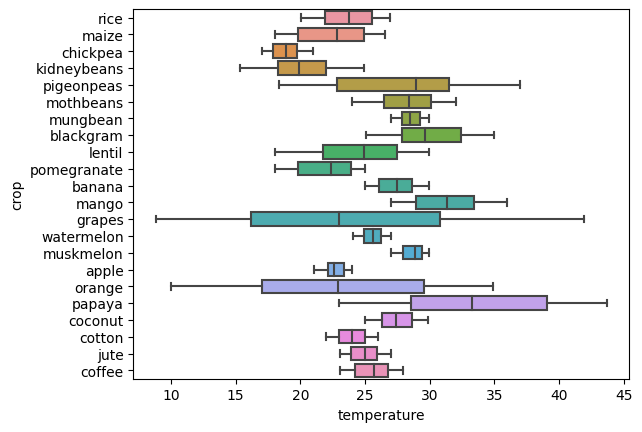

In [25]:
# ----------------------
#   Temperature x Crop
# ----------------------

sns.boxplot(x=df["temperature"], y=df["crop"])

A maior parte dos valores está ao redor da média, que é de aproximadamente 25. Apesar de certos valores apresentarem grande variação, como *grapes* e *orange*, isso não afetou a curva.

<Axes: xlabel='humidity', ylabel='crop'>

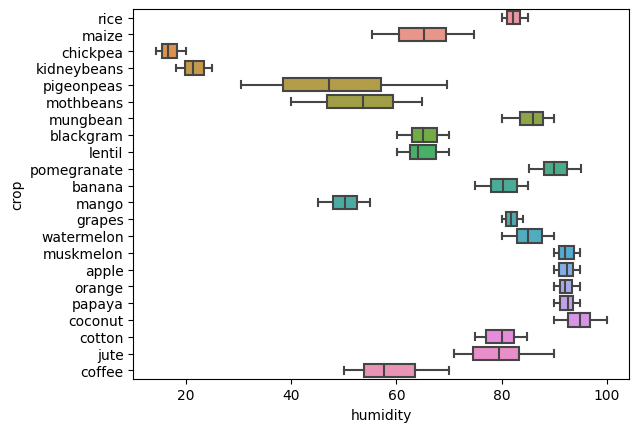

In [26]:
# --------------------
#   Humidity x Crop
# --------------------

sns.boxplot(x=df["humidity"], y=df["crop"])

<Axes: xlabel='ph', ylabel='crop'>

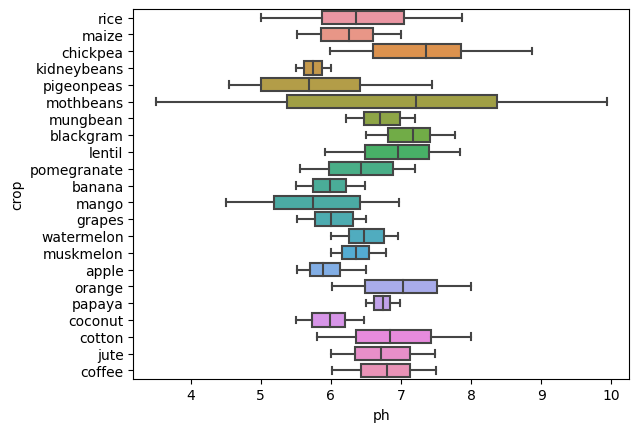

In [27]:
# --------------
#   ph x Crop
# --------------

sns.boxplot(x=df["ph"], y=df["crop"])

O padrão se repete com o atributo *pH*. A maior parte dos valores está concentrada ao redor da média. Neste caso, tal resultado é previsível, visto que essa medida varia entre 0 e 14, e 7 representa um meio neutro (a média dos valores foi de aproximadamente 6,4)

<Axes: xlabel='rainfall', ylabel='crop'>

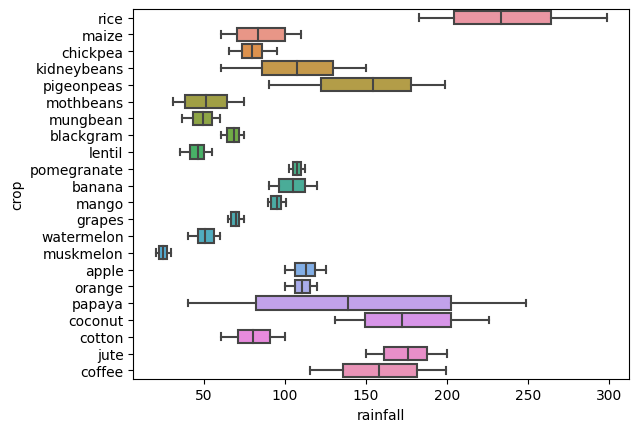

In [28]:
# --------------------
#   Rainfall x Crop
# --------------------

sns.boxplot(x=df["rainfall"], y=df["crop"])

É possível perceber, então, que há certa separação no que tange aos atributos para cada tipo de cultura. Há indícios, portanto, de que é possível classificar o rótulo de novas observações a partir deste conjunto de variáveis.

### 4.2.3. Balaceamento dos Dados

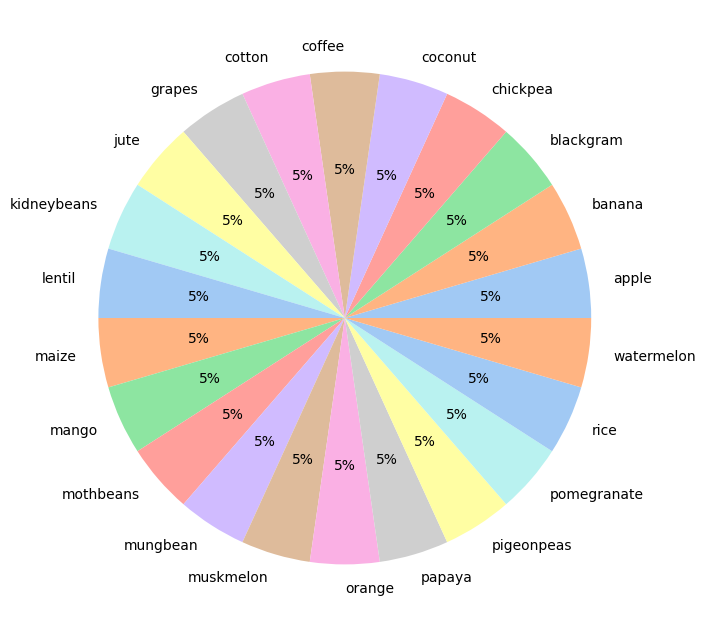

In [29]:
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')

plt.pie(df['crop'].groupby(df['crop']).count(), labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

É possível perceber que a distribuição dos valores é idêntica.

## 4.3. Correlação entre as Variáveis

<Axes: >

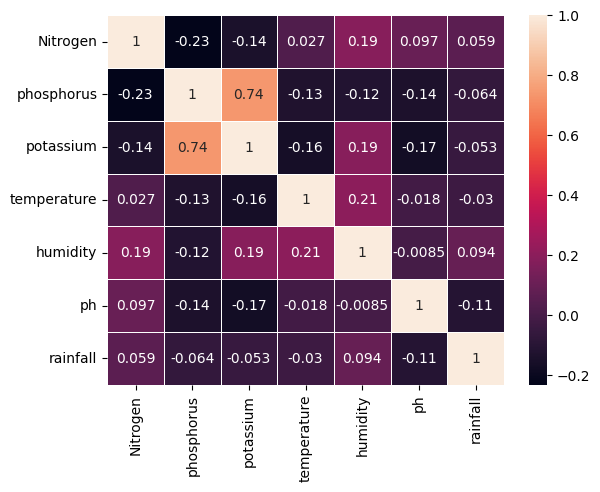

In [30]:
# Mapa de calor com as correlações entre os atributos
sns.heatmap(df.drop(columns=["crop"]).corr(), annot=True, linewidths=0.5)

A maior parte das variáveis **não** está relacionada entre si, com exceção dos atributos *potassium* e *phosphorus*, que possuem uma correlação positiva considerável. Para que a classificação dos dados seja mais efetiva, um dos atributos pode ser removido. Abaixo é possível visualizar a **matriz de dispersão** entre todos as culturas possíveis (os rótulos) e os atributos, o que é necessário para avaliar qual das duas variáveis relacionadas poderia ser removida.

<Axes: >

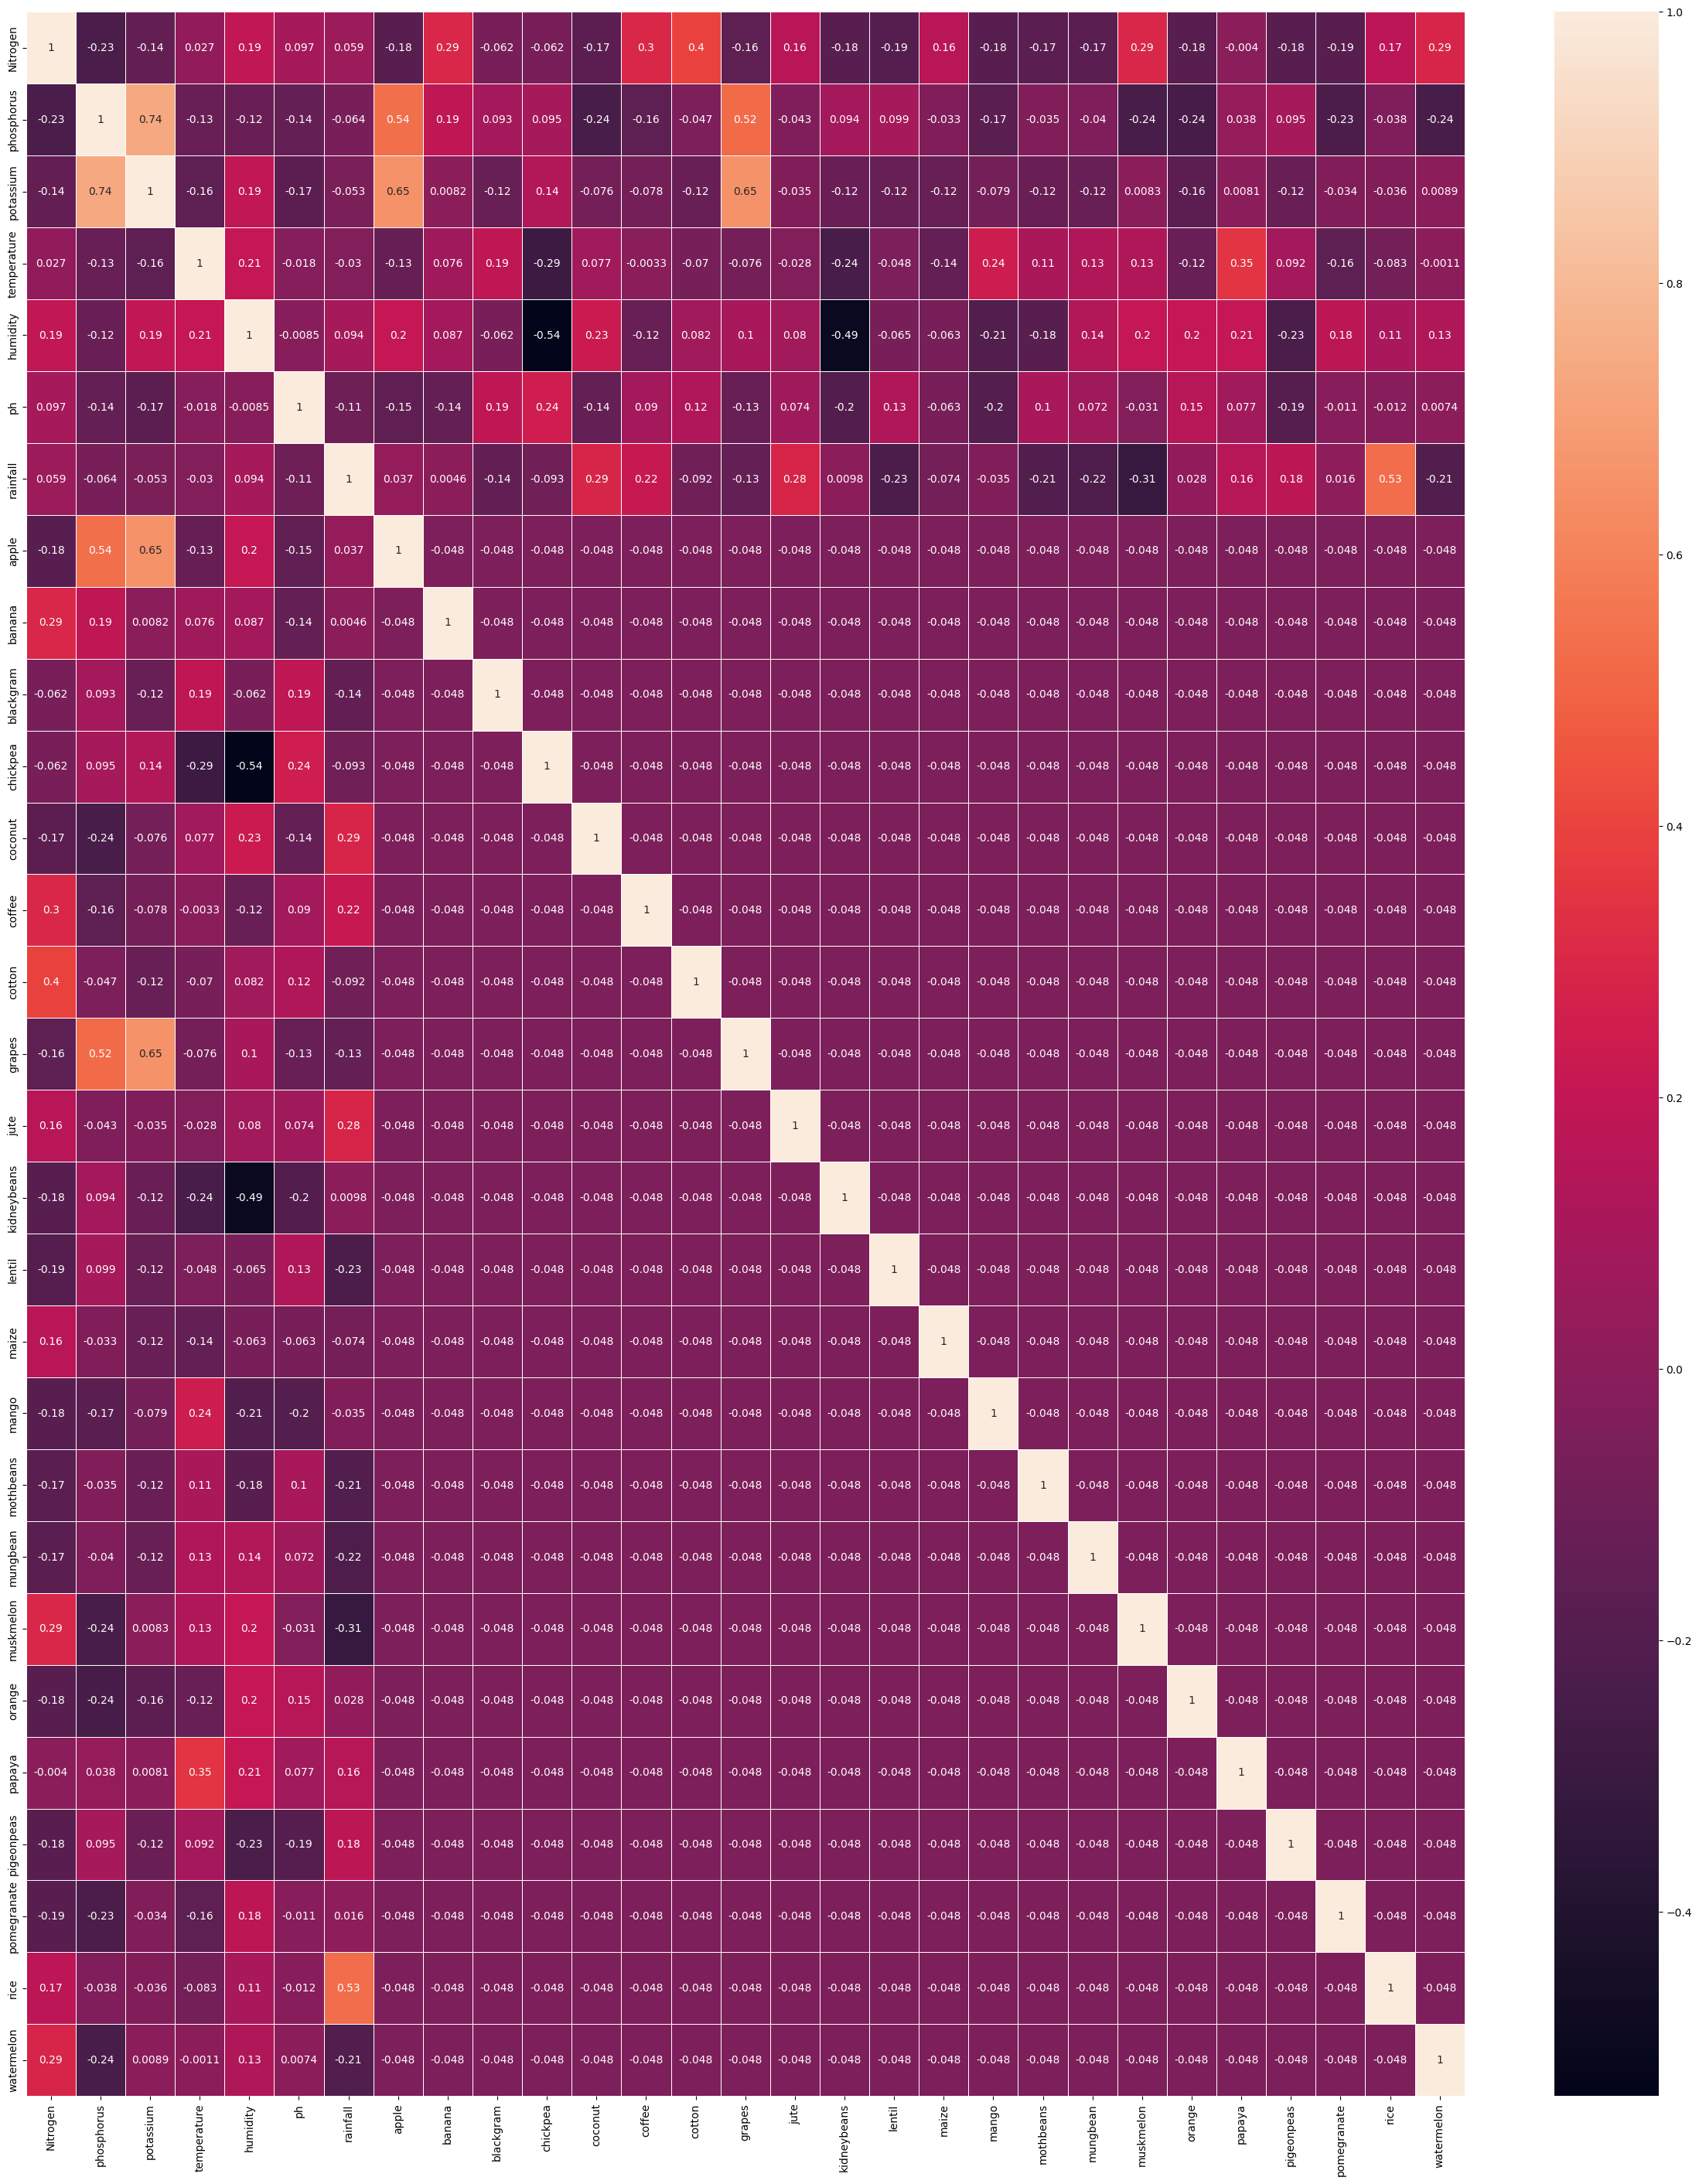

In [31]:
dummies = pd.get_dummies(df['crop'])
dummy_df = pd.concat([df, dummies], axis=1)

plt.figure(figsize=(30, 35))
corr = dummy_df.drop(columns=["crop"]).corr()
sns.heatmap(corr, annot=True, linewidths=0.5)

É possível perceber que dentre elas a que possui maior relação com os atributos-alvo é a *potassium*. Sendo assim, uma possível saída para o problema seria remover a variável *phosporus* do conjunto de dados, visto que *potassium* tem maior relação com o atributo-alvo.

In [32]:
# Interação entre os atributos preditivos
# sns.pairplot(df, hue='crop')

# 5. Treinamento dos Modelos

## 5.1 Modelos de Classificação 

### 5.1.1 K-Nearest Neighbors

In [62]:
kf = KFold(n_splits=5)
kf.get_n_splits(df)

X = df.drop('crop', axis=1)
y = df['crop']

all_scores = []

for i, (train_index, test_index) in enumerate(kf.split(df)):
    train_data, test_data = X.values[train_index], X.values[test_index]
    train_labels, test_labels = y.values[train_index], y.values[test_index]

    scores = []
    for k in range(1,50):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(train_data, train_labels)
        scores.append(knn.score(test_data, test_labels))
    
    all_scores.append(scores)

np.mean(all_scores,axis=0)

array([0.17909091, 0.17818182, 0.17772727, 0.17590909, 0.17636364,
       0.17409091, 0.17409091, 0.17227273, 0.17227273, 0.17181818,
       0.17181818, 0.16909091, 0.17045455, 0.16772727, 0.16863636,
       0.16636364, 0.16590909, 0.16409091, 0.16227273, 0.16090909,
       0.15909091, 0.15818182, 0.15818182, 0.15681818, 0.15590909,
       0.15454545, 0.15363636, 0.15181818, 0.15181818, 0.15181818,
       0.15227273, 0.15      , 0.14863636, 0.14636364, 0.145     ,
       0.14272727, 0.14090909, 0.13909091, 0.13909091, 0.13590909,
       0.12863636, 0.12681818, 0.12318182, 0.12045455, 0.11363636,
       0.10636364, 0.10409091, 0.10227273, 0.09909091])

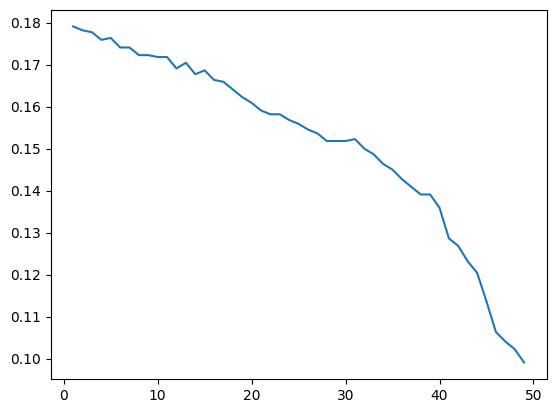

In [64]:
plt.plot(range(1,50), np.mean(all_scores,axis=0))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42)

for k in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_data, train_labels)
    print(f'{k}: {knn.score(test_data, test_labels)}')

1: 0.08863636363636364
2: 0.09090909090909091
3: 0.09090909090909091
4: 0.08636363636363636
5: 0.08863636363636364
6: 0.08636363636363636
7: 0.08636363636363636
8: 0.08636363636363636
9: 0.08636363636363636
10: 0.08636363636363636
11: 0.08636363636363636
12: 0.08409090909090909
13: 0.08636363636363636
14: 0.08409090909090909
15: 0.08636363636363636
16: 0.08409090909090909
17: 0.08409090909090909
18: 0.08181818181818182
19: 0.08181818181818182
20: 0.08181818181818182
21: 0.08181818181818182
22: 0.08181818181818182
23: 0.08181818181818182
24: 0.07954545454545454
25: 0.07954545454545454
26: 0.075
27: 0.07272727272727272
28: 0.07045454545454545
29: 0.07045454545454545


### 5.1.2 Naive Bayes

In [65]:
kf = KFold(n_splits=5)
kf.get_n_splits(df)

X = df.drop('crop', axis=1)
y = df['crop']

scores = []

for i, (train_index, test_index) in enumerate(kf.split(df)):
    train_data, test_data = X.values[train_index], X.values[test_index]
    train_labels, test_labels = y.values[train_index], y.values[test_index]
    
    gnb = GaussianNB()
    gnb.fit(train_data, train_labels)
    scores.append(gnb.score(test_data, test_labels))

np.mean(scores)

0.18181818181818182

### 5.1.3 Árvore de Decisão

In [69]:
kf = KFold(n_splits=5)
kf.get_n_splits(df)

X = df.drop('crop', axis=1)
y = df['crop']

all_scores = []

for i, (train_index, test_index) in enumerate(kf.split(df)):
    train_data, test_data = X.values[train_index], X.values[test_index]
    train_labels, test_labels = y.values[train_index], y.values[test_index]
    
    scores = []
    for i in range(1, 15):
        clf = DecisionTreeClassifier(max_depth=i)
        clf.fit(train_data, train_labels)
        scores.append(clf.score(test_data, test_labels))

    all_scores.append(scores)

np.mean(all_scores, axis=0)

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01818182, 0.02090909, 0.07681818, 0.11272727, 0.175     ,
       0.17681818, 0.17727273, 0.17863636, 0.17681818])

# 6. Avaliação dos Modelos

# 7. Referências Bibliográficas

* SISTEMA DE PRODUÇÃO DE MELÃO. [S. l.]: Embrapa Semiárido, ISSN 1807-0027. Mensal. Disponível em: http://www.cpatsa.embrapa.br:8080/sistema_producao/spmelao/manejo_do_solo.html. Acesso em: 1 maio 2023;

* SOUSA, Rafaela. Rotação de culturas. [S. l.]: Brasil Escola. Disponível em: https://brasilescola.uol.com.br/geografia/rotacao-culturas.htm. Acesso em: 1 maio 2023.